## Илющенко Артемий Владимирович КИ23-20Б

In [154]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задание №1 

In [155]:
norm_data=np.random.normal(size=1000)
exp_data=np.random.exponential(size=1000)
uni_data=np.random.uniform(size=1000)
geom_data=np.random.geometric(0.5,size=1000)

In [156]:

def draw_hists(norm_data,exp_data,uni_data,geom_data,title):
    fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(11,9))
    fig.suptitle(title)
    
    sns.histplot(data=norm_data,ax=axes[0][0])
    axes[0][0].set_title('Нормальное')
    
    sns.histplot(data=exp_data,ax=axes[0][1])
    axes[0][1].set_title('Экспоненциальное')
    
    sns.histplot(data=uni_data,ax=axes[1][0])
    axes[1][0].set_title('Равномерное')
    
    sns.histplot(data=geom_data,ax=axes[1][1])
    axes[1][1].set_title('Геометрическое')


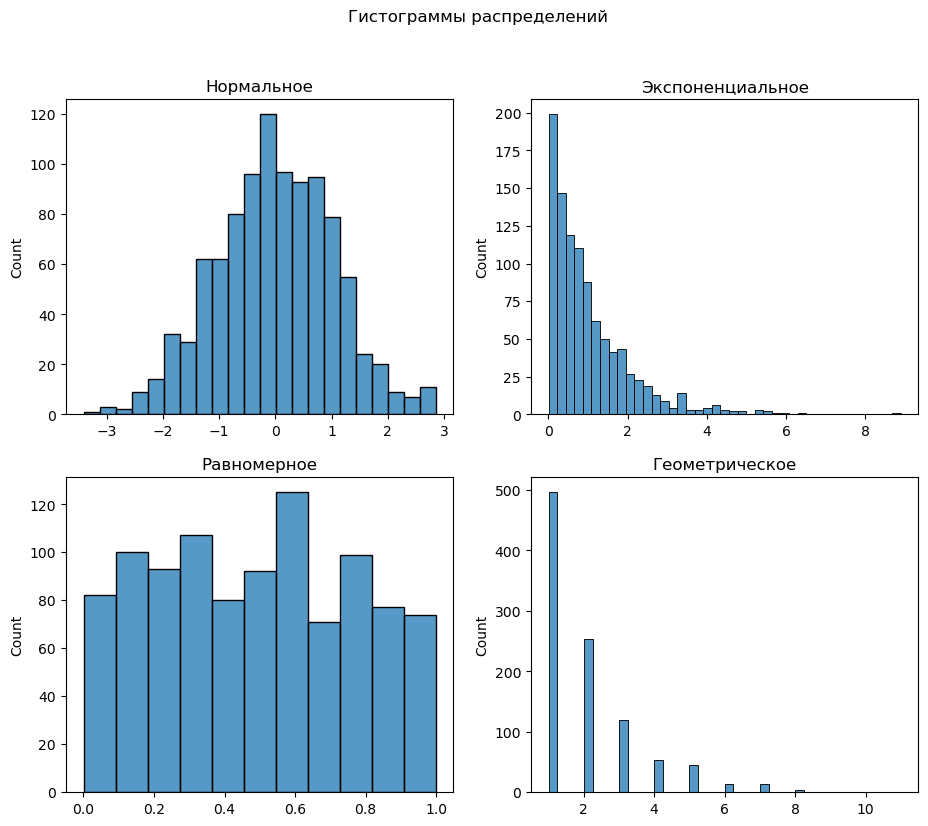

In [157]:
draw_hists(norm_data,exp_data,uni_data,geom_data,'Гистограммы распределений')

In [158]:
def standartizer(data:np.array):
    return (data-data.mean())/data.std()

In [159]:
norm_data,exp_data,uni_data,geom_data=standartizer(norm_data),standartizer(exp_data),standartizer(uni_data),standartizer(geom_data)

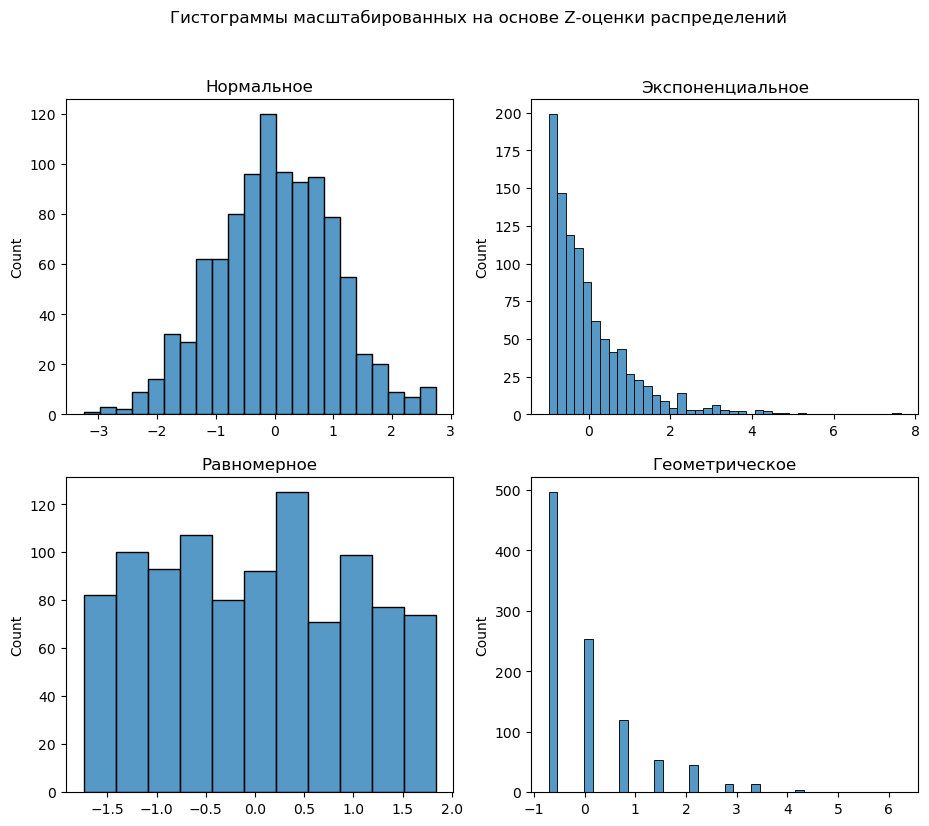

In [160]:
draw_hists(norm_data,exp_data,uni_data,geom_data,'Гистограммы масштабированных на основе Z-оценки распределений')

In [161]:
def min_max_scaler(data:np.array):
    return (data-data.min())/(data.max()-data.min())

In [162]:
norm_data,exp_data,uni_data,geom_data=min_max_scaler(norm_data),min_max_scaler(exp_data),min_max_scaler(uni_data),min_max_scaler(geom_data)

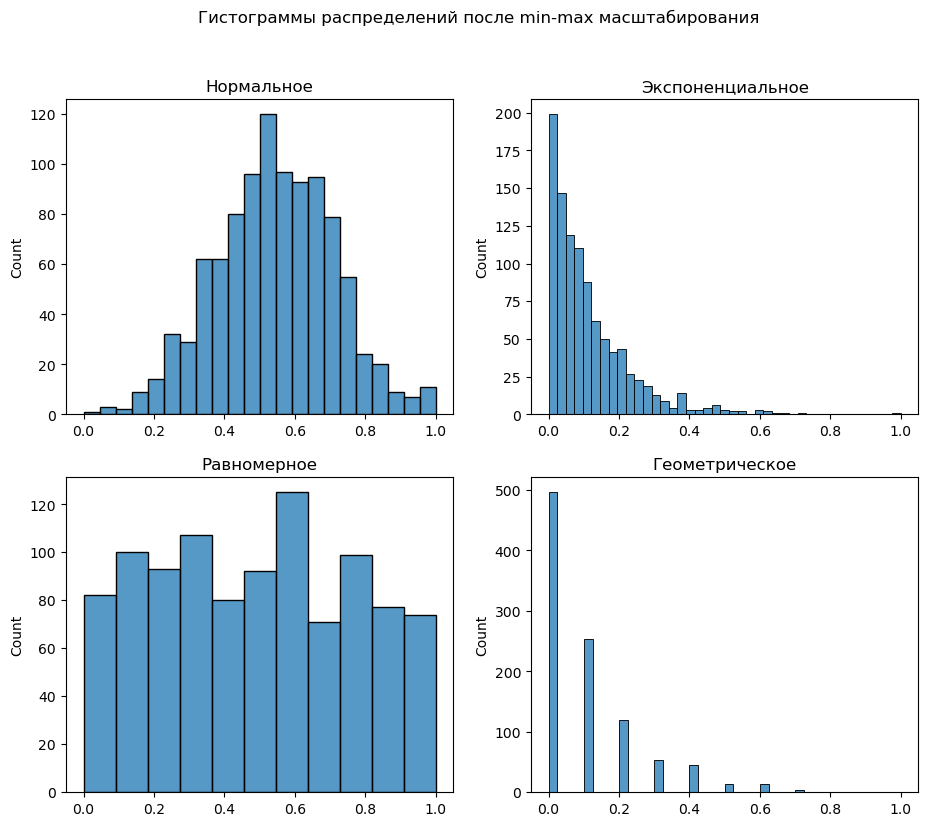

In [163]:
draw_hists(norm_data,exp_data,uni_data,geom_data,'Гистограммы распределений после min-max масштабирования')

# Задание №2

In [191]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [192]:
titanic_data=pd.read_csv('titanic.csv')

In [193]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [195]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [196]:
titanic_data=titanic_data.set_index(keys='PassengerId')
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [197]:
titanic_data=titanic_data[['Age','Fare','Pclass','Sex','Embarked','Survived']]
titanic_data

,Age,Fare,Pclass,Sex,Embarked,Survived
PassengerId,,,,,,
1,22.0,7.2500,3,male,S,0
2,38.0,71.2833,1,female,C,1
3,26.0,7.9250,3,female,S,1
4,35.0,53.1000,1,female,S,1
5,35.0,8.0500,3,male,S,0
...,...,...,...,...,...,...
887,27.0,13.0000,2,male,S,0
888,19.0,30.0000,1,female,S,1
889,NaN,23.4500,3,female,S,0


In [198]:
titanic_data=pd.get_dummies(titanic_data,drop_first=True,dtype=int)
titanic_data

,Age,Fare,Pclass,Survived,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,
1,22.0,7.2500,3,0,1,0,1
2,38.0,71.2833,1,1,0,0,0
3,26.0,7.9250,3,1,0,0,1
4,35.0,53.1000,1,1,0,0,1
5,35.0,8.0500,3,0,1,0,1
...,...,...,...,...,...,...,...
887,27.0,13.0000,2,0,1,0,1
888,19.0,30.0000,1,1,0,0,1
889,NaN,23.4500,3,0,0,0,1


## Будем использовать замену пустых значений с помощью случайного леса

In [199]:
imputer=IterativeImputer(estimator=RandomForestRegressor(),max_iter=10,random_state=42)

In [200]:
titanic_data=pd.DataFrame(data=imputer.fit_transform(titanic_data),columns=titanic_data.columns)
titanic_data

/usr/lib/python3.13/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Age,Fare,Pclass,Survived,Sex_male,Embarked_Q,Embarked_S
0,22.000000,7.2500,3.0,0.0,1.0,0.0,1.0
1,38.000000,71.2833,1.0,1.0,0.0,0.0,0.0
2,26.000000,7.9250,3.0,1.0,0.0,0.0,1.0
3,35.000000,53.1000,1.0,1.0,0.0,0.0,1.0
4,35.000000,8.0500,3.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
886,27.000000,13.0000,2.0,0.0,1.0,0.0,1.0
887,19.000000,30.0000,1.0,1.0,0.0,0.0,1.0
888,20.092619,23.4500,3.0,0.0,0.0,0.0,1.0
889,26.000000,30.0000,1.0,1.0,1.0,0.0,0.0


In [204]:
titanic_data['Age']=standartizer(titanic_data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

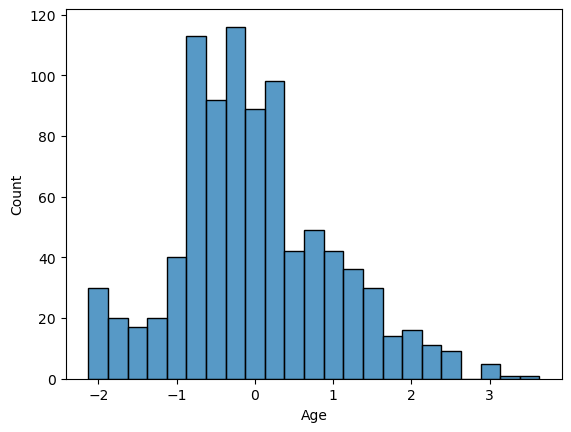

In [205]:
sns.histplot(data=titanic_data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

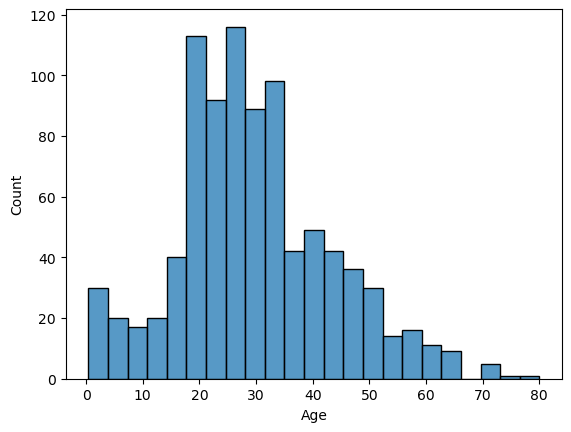

In [202]:
sns.histplot(data=titanic_data['Age'])